## 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

## 2. 데이터 불러오기

In [4]:
df = pd.read_csv('./CARD_SPENDING_RESIDENT.txt',sep='\t',engine='python',encoding='cp949')
df.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [5]:
df['MCT_CAT_CD'].nunique()

23

In [6]:
df.tail()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194
2537752,20200531,350,720,81,M,65,5,29


In [7]:
# USE_CNT(이용건수) * USE_AMT(이용금액) = Sum으로 계산해서 출력하기 -> MCT_CAT_CD로 계산하기

In [8]:
df.shape

(2537753, 8)

## 3. 데이터 기본 정보

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   STD_DD      int64 
 1   GU_CD       int64 
 2   DONG_CD     int64 
 3   MCT_CAT_CD  int64 
 4   SEX_CD      object
 5   AGE_CD      int64 
 6   USE_CNT     int64 
 7   USE_AMT     int64 
dtypes: int64(7), object(1)
memory usage: 154.9+ MB


## 4. 결측치 보기

In [10]:
df.isnull().sum().sort_values(ascending=False) # 결측치가 없기

USE_AMT       0
USE_CNT       0
AGE_CD        0
SEX_CD        0
MCT_CAT_CD    0
DONG_CD       0
GU_CD         0
STD_DD        0
dtype: int64

## 01. { 시기별로 일단 나누기 } 
* 일단 시기별로 나누고 지역별로 나누고 성별로 나누기

### 01.1 {{ 년도 별로 나누기 }}

In [11]:
df['YEAR'] = df['STD_DD'].map(lambda x:str(x)[0:4])
df['YE_MO'] = df['STD_DD'].map(lambda x:str(x)[0:6])
df.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,YEAR,YE_MO
0,20190201,110,517,10,F,25,11,595,2019,201902
1,20190201,110,517,10,F,50,5,243,2019,201902
2,20190201,110,517,10,F,55,5,27,2019,201902
3,20190201,110,517,10,M,20,11,243,2019,201902
4,20190201,110,517,10,M,25,11,433,2019,201902


In [12]:
# 일단은 년 별로 보기
df_19 = df[df['YEAR']=='2019']
df_20 = df[df['YEAR']=='2020']
# 자주 구입한것이랑 총 소비금액은 다름 -> 금액 차이가 있으니까 : 그래서 이용건수를 토대로 계산하기로 함

In [80]:
df_19_Kind = df_19.pivot_table(index='MCT_CAT_CD',values='USE_CNT',aggfunc='sum')
df_19_Kind = df_19_Kind.reset_index()
df_19_Kind
# 80 : 요식업소 40 : 유통업 52 : 사무통신 70 : 의료기관 81 : 음료식품 -> 잘 된 사업
# 31 : 전기 30 : 가구  60 : 자동차판매 43 : 직물 32 : 주방용구 -> 망한 사업

,MCT_CAT_CD,USE_CNT
0,10,511736
1,20,1362051
2,21,2658105
3,22,945526
4,30,18496
5,31,4728
6,32,62396
7,33,3273195
8,34,116398
9,35,125404


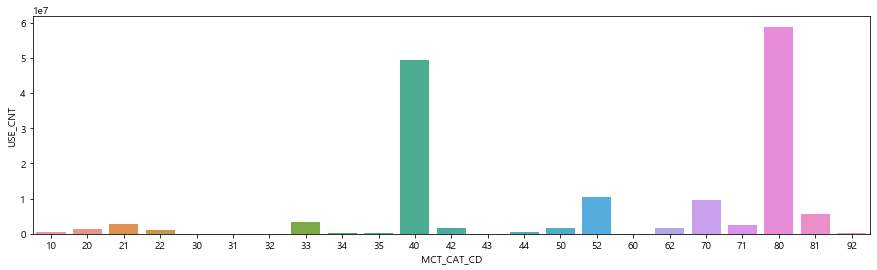

In [81]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_19_Kind,x='MCT_CAT_CD',y='USE_CNT')

In [82]:
df_20_Kind = df_20.pivot_table(index='MCT_CAT_CD',values='USE_CNT',aggfunc='sum')
df_20_Kind = df_20_Kind.reset_index()
df_20_Kind.head()
# 80 : 요식업소 40 : 유통업 70 : 의료기관 52 : 사무통신 81 : 음료식품 -> 잘 된 사업
# 31 : 전기 30 : 가구  60 : 자동차 판매  43 : 직물  32 : 주방용구 -> 망한 사업
## 비슷한 결과라는 것을 알 수 있다

,MCT_CAT_CD,USE_CNT
0,10,344995
1,20,1028462
2,21,2250509
3,22,479961
4,30,16333


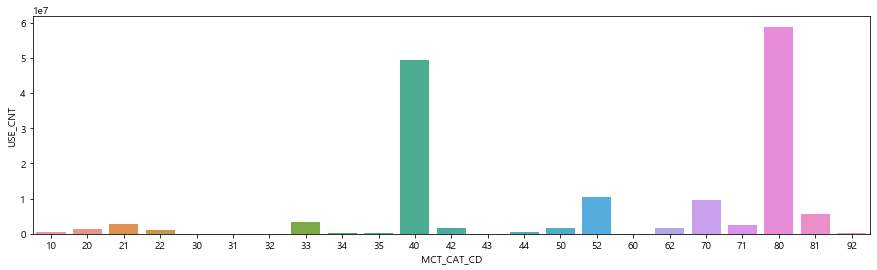

In [83]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_19_Kind,x='MCT_CAT_CD',y='USE_CNT')

In [84]:
df_Kind_sum = df_19_Kind.copy()
df_Kind_sum['Year']=19
for i in range(0,len(df_20_Kind.index)):
    df_Kind_sum.loc[23+i] = [df_20_Kind.iloc[i,0],df_20_Kind.iloc[i,1],20]
df_Kind_sum.head()

,MCT_CAT_CD,USE_CNT,Year
0,10,511736,19
1,20,1362051,19
2,21,2658105,19
3,22,945526,19
4,30,18496,19


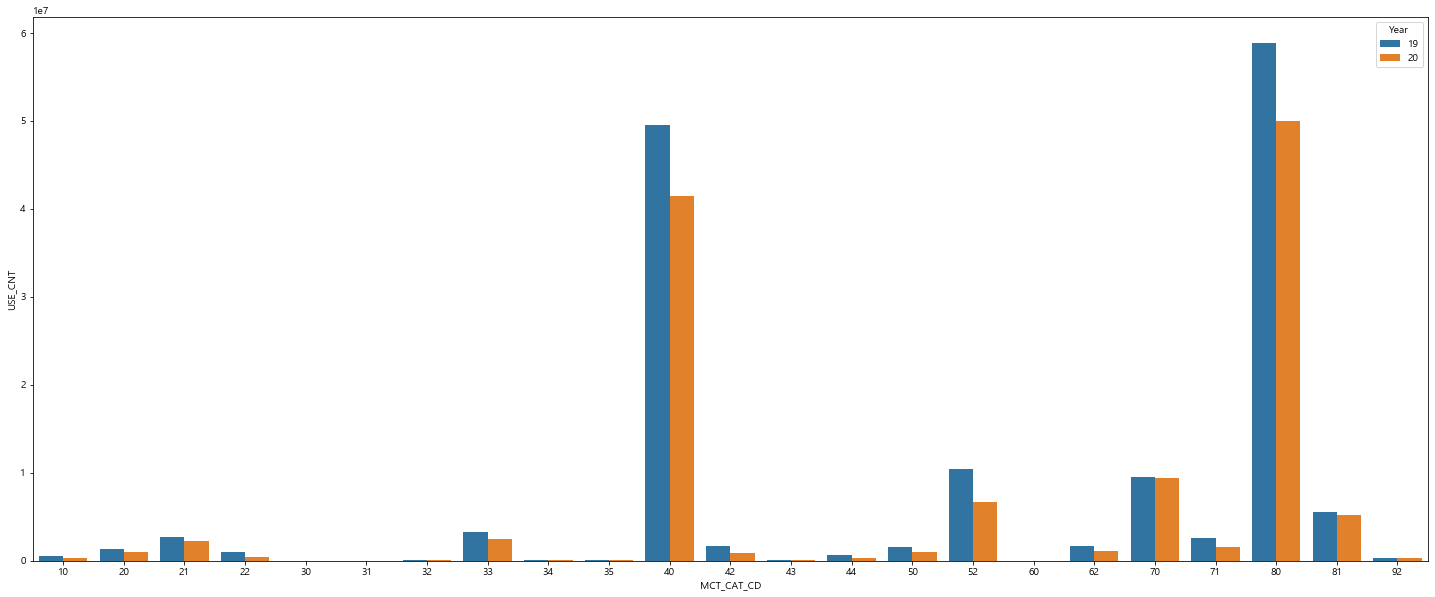

In [85]:
plt.figure(figsize=(25,10))
sns.barplot(data=df_Kind_sum,x='MCT_CAT_CD',y='USE_CNT',hue='Year')

In [86]:
# 음... 보시면 19년도에 비해 20년도의 소비가 감소한것으로 보이는걸로 봐서 왜 그러는지 잘 모르겠음
df_19_Amount = df_19.pivot_table(index='MCT_CAT_CD',values='USE_AMT',aggfunc='sum')
df_19_Amount = df_19_Amount.reset_index()
df_19_Amount
# 40 : 유통업 80 : 요식업소 70 : 의료기관 33 : 연료판매 71 : 보건위생 -> 잘 된 사업
# 31 : 전기 30 : 가구  34 : 광학제품 92 : 수리서비스 430 : 직물 -> 망한 사업

,MCT_CAT_CD,USE_AMT
0,10,63939157
1,20,102633333
2,21,56179519
3,22,23425696
4,30,7470184
5,31,1051101
6,32,9643093
7,33,142093443
8,34,8183860
9,35,33357303


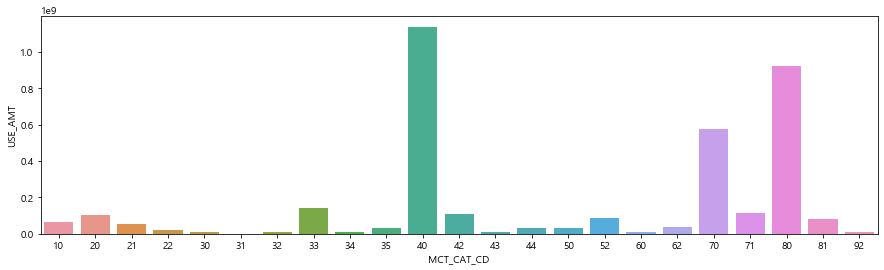

In [87]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_19_Amount,x='MCT_CAT_CD',y='USE_AMT')

In [88]:
df_20_Amount = df_20.pivot_table(index='MCT_CAT_CD',values='USE_AMT',aggfunc='sum')
df_20_Amount = df_20_Amount.reset_index()
df_20_Amount.tail()
# 40 : 유통업 80 : 요식업소 70 : 의료기관 33 : 연료판매 81 : 음료식품 -> 잘 된 사업
# 31 : 전기 34 : 광학제품 43 : 직물 92 : 수리서비스 32 : 주방용구-> 망한 사업
## 비슷한 결과라는 것을 알 수 있다

,MCT_CAT_CD,USE_AMT
18,70,522890221
19,71,82768637
20,80,726877815
21,81,84504150
22,92,8298728


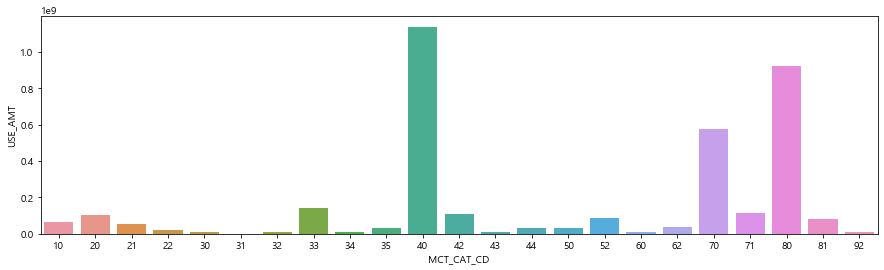

In [89]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_19_Amount,x='MCT_CAT_CD',y='USE_AMT')

In [72]:
df_Amount_sum = df_19_Amount.copy()
df_Amount_sum['Year']=19
for i in range(0,len(df_20_Amount.index)):
    df_Amount_sum.loc[23+i] = [df_20_Amount.iloc[i,0],df_20_Amount.iloc[i,1],20]
df_Amount_sum.head()

,MCT_CAT_CD,USE_AMT,Year
10,40,1139972810,19
20,80,922666061,19
18,70,577327073,19
7,33,142093443,19
19,71,112925672,19


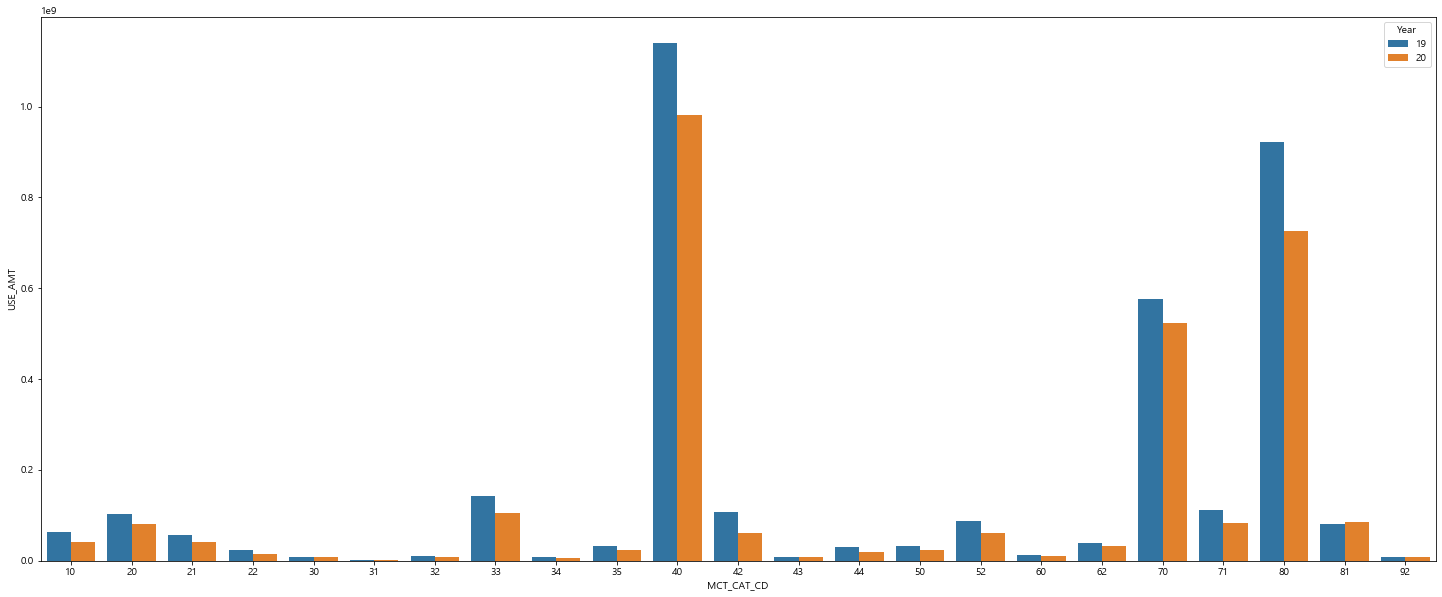

In [73]:
plt.figure(figsize=(25,10))
sns.barplot(data=df_Amount_sum,x='MCT_CAT_CD',y='USE_AMT',hue='Year')
# -> 결국 나올 수 있는 지표는 신용카드를 적게썼다라는 말밖에 없음

In [107]:
df_19_Kind['Subtract']=df_19_Kind['USE_CNT']-df_20_Kind['USE_CNT']
df_19_Kind['SubtractPercent']=(df_19_Kind['USE_CNT']-df_20_Kind['USE_CNT'])/df_19_Kind['USE_CNT']
df_19_Kind.sort_values(by='Subtract')
# 증가한 사업은 자동차 판매, 전기사업
# 감소한 사업은 요식업소, 유통업, 사무통신, 보건위생, 의복
#### 잘 모르겠음

,MCT_CAT_CD,USE_CNT,Subtract,SubtractPercent
16,60,19966,-1291,-0.064660
5,31,4728,-724,-0.153130
6,32,62396,1770,0.028367
4,30,18496,2163,0.116944
12,43,57289,7816,0.136431
22,92,291829,26751,0.091667
8,34,116398,34032,0.292376
9,35,125404,40357,0.321816
18,70,9491925,60646,0.006389
0,10,511736,166741,0.325834


In [109]:
df_19_Kind.sort_values(by='SubtractPercent')
# 문화취미, 의목, 신변잡화, 서적문구, 자동차정비

,MCT_CAT_CD,USE_CNT,Subtract,SubtractPercent
5,31,4728,-724,-0.153130
16,60,19966,-1291,-0.064660
18,70,9491925,60646,0.006389
6,32,62396,1770,0.028367
21,81,5546242,292283,0.052699
22,92,291829,26751,0.091667
4,30,18496,2163,0.116944
12,43,57289,7816,0.136431
20,80,58855989,8842066,0.150232
2,21,2658105,407596,0.153341


In [110]:
df_19_Amount['Subtract']=df_19_Amount['USE_AMT']-df_20_Amount['USE_AMT']
df_19_Amount['SubtractPercent']=(df_19_Amount['USE_AMT']-df_20_Amount['USE_AMT'])/df_19_Amount['USE_AMT']
df_19_Amount.sort_values(by='Subtract')
# 증가한 사업은 음료식품, 가구, 전기
# 감소한 사업은 요식업소, 유통업, 의료기관 의복 연료판매
#### 잘 모르겠음

,MCT_CAT_CD,USE_AMT,Subtract,SubtractPercent
21,81,81856380,-2647770,-0.032347
4,30,7470184,-1209227,-0.161874
5,31,1051101,-38897,-0.037006
22,92,8328622,29894,0.003589
12,43,8481213,950709,0.112096
6,32,9643093,1098099,0.113874
16,60,12323158,1684952,0.136731
8,34,8183860,2399527,0.293202
17,62,39511443,6502982,0.164585
14,50,32779451,8785281,0.268012


In [111]:
df_19_Amount.sort_values(by='SubtractPercent')
# 증가한 사업 : 가구, 전기, 음료식품
# 감소한 사업 : 의복, 문화취미, 숙박, 신변잡화, 사무통신

,MCT_CAT_CD,USE_AMT,Subtract,SubtractPercent
4,30,7470184,-1209227,-0.161874
5,31,1051101,-38897,-0.037006
21,81,81856380,-2647770,-0.032347
22,92,8328622,29894,0.003589
18,70,577327073,54436852,0.094291
12,43,8481213,950709,0.112096
6,32,9643093,1098099,0.113874
16,60,12323158,1684952,0.136731
10,40,1139972810,158506204,0.139044
17,62,39511443,6502982,0.164585


### 01.2 {{ 월별로 나누기 }}

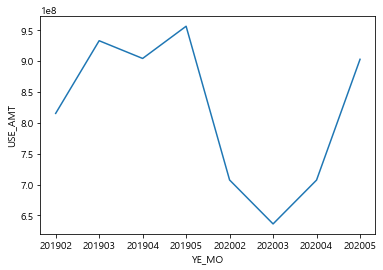

In [103]:
df_a = df.pivot_table(index='YE_MO',values='USE_AMT',aggfunc='sum').reset_index()
sns.lineplot(data=df_a,x='YE_MO',y='USE_AMT')

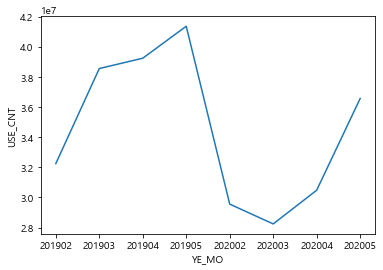

In [105]:
df_b = df.pivot_table(index='YE_MO',values='USE_CNT',aggfunc='sum').reset_index()
sns.lineplot(data=df_b,x='YE_MO',y='USE_CNT')